<a href="https://colab.research.google.com/github/Ajayrajc1998/Image-classifier-using-CNN/blob/final_train/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!pip show opencv-python

Name: opencv-python
Version: 4.8.0.76
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [ ]:
!pip install opencv-python

In [5]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
GPU()

In [ ]:
os.getcwd()

'/content'

Found 3179 files belonging to 2 classes.


Function for Data loading

In [6]:
def data_loading(Image):
  import tensorflow as tf
  import numpy as np
  from matplotlib import pyplot as plt
  data = tf.keras.utils.image_dataset_from_directory(Image)
  data_iterator = data.as_numpy_iterator()
  batch = data_iterator.next()
  fig, ax = plt.subplots(ncols=4, figsize=(20,20))
  for idx, img in enumerate(batch[0][:4]):
      ax[idx].imshow(img.astype(int))
      ax[idx].title.set_text(batch[1][idx])
  return data

Found 6000 files belonging to 2 classes.


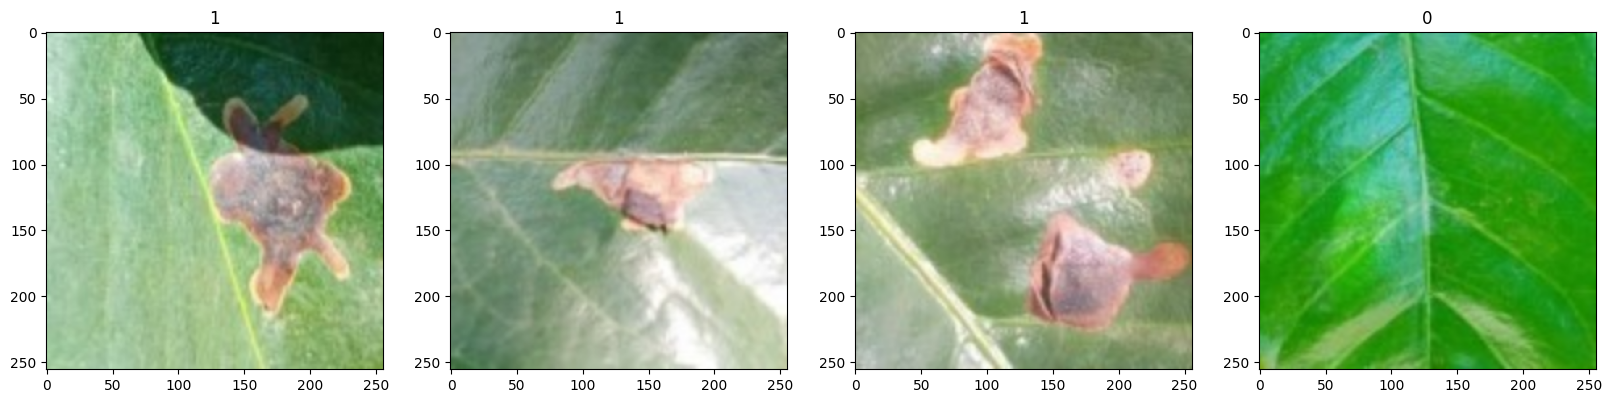

In [7]:
data=data_loading('/content/drive/MyDrive/Sample Data')

Scaling the image

In [8]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.25490198, 0.50980395, 0.5254902 ],
          [0.2529412 , 0.50784314, 0.5235294 ],
          [0.24901961, 0.50392157, 0.51960784],
          ...,
          [0.25980392, 0.5147059 , 0.49117646],
          [0.26960784, 0.5245098 , 0.5009804 ],
          [0.27450982, 0.5294118 , 0.5058824 ]],
 
         [[0.25490198, 0.50980395, 0.5254902 ],
          [0.25343138, 0.5083333 , 0.5240196 ],
          [0.2504902 , 0.50539213, 0.5210784 ],
          ...,
          [0.27009803, 0.525     , 0.50147057],
          [0.28088236, 0.5357843 , 0.5122549 ],
          [0.28627452, 0.5411765 , 0.5176471 ]],
 
         [[0.25490198, 0.50980395, 0.5254902 ],
          [0.25441176, 0.5093137 , 0.525     ],
          [0.25343138, 0.5083333 , 0.5240196 ],
          ...,
          [0.29068628, 0.54558825, 0.52205884],
          [0.30343136, 0.55833334, 0.5348039 ],
          [0.30980393, 0.5647059 , 0.5411765 ]],
 
         ...,
 
         [[0.42941177, 0.6509804 , 0.654902  ],
          [0.43504

Split the data into train and test.

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Model architecture and summary.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

Model Training

In [16]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
131/131 [==============================] - 441s 3s/step - loss: 5.5868e-04 - accuracy: 1.0000 - val_loss: 4.3141e-05 - val_accuracy: 1.0000
Epoch 2/10
131/131 [==============================] - 35s 263ms/step - loss: 1.7500e-05 - accuracy: 1.0000 - val_loss: 9.0336e-06 - val_accuracy: 1.0000
Epoch 3/10
131/131 [==============================] - 35s 267ms/step - loss: 5.1005e-06 - accuracy: 1.0000 - val_loss: 3.4211e-06 - val_accuracy: 1.0000
Epoch 4/10
131/131 [==============================] - 36s 269ms/step - loss: 2.6082e-06 - accuracy: 1.0000 - val_loss: 2.0834e-06 - val_accuracy: 1.0000
Epoch 5/10
131/131 [==============================] - 33s 246ms/step - loss: 1.6834e-06 - accuracy: 1.0000 - val_loss: 1.3710e-06 - val_accuracy: 1.0000
Epoch 6/10
131/131 [==============================] - 36s 271ms/step - loss: 1.1840e-06 - accuracy: 1.0000 - val_loss: 1.0139e-06 - val_accuracy: 1.0000
Epoch 7/10
131/131 [==============================] - 36s 273ms/step - loss: 9.1758e

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Checking the loss function graph

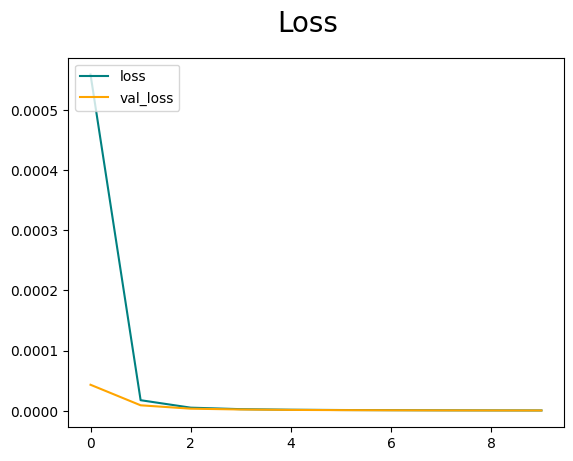

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Checking the performance graphically

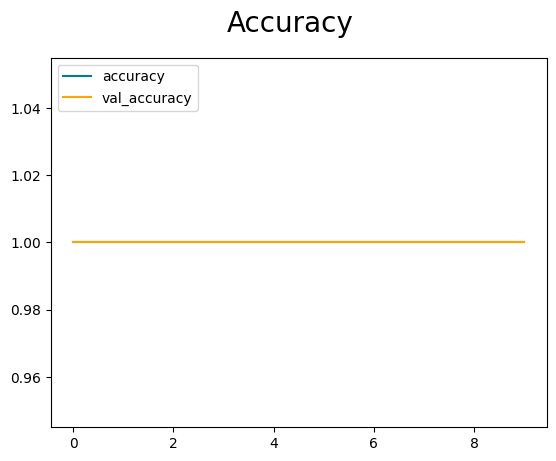

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Checking the models performance

In [20]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 28ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


For Predicting the classification using the model

In [25]:
def test_data(image_path):
  import cv2
  import numpy as np
  img = cv2.imread(image_path)
  resize = tf.image.resize(img, (256,256))
  yhat = model.predict(np.expand_dims(resize/255, 0))
  print('yhat value',yhat)
  if yhat > 0.5:
    print(f'Miner')
  else:
      print(f'Healthy')
  plt.imshow(resize.numpy().astype(int))
  plt.imshow(img)
  plt.show()

1/1 [==============================] - 0s 243ms/step
yhat value [[6.333541e-05]]
Healthy


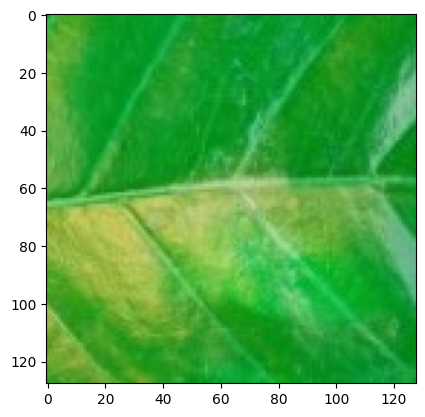

In [26]:
test_data('healthy1.jpg')

1/1 [==============================] - 0s 18ms/step
yhat value [[1.]]
Miner


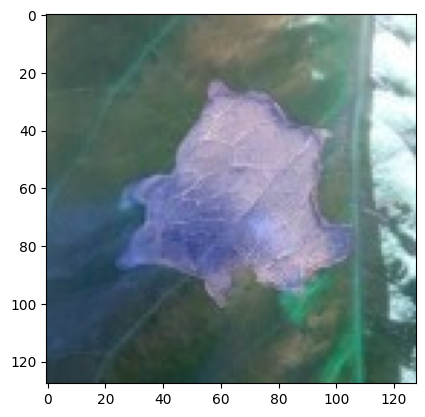

In [27]:
test_data('Miner1.jpg')

Now Saving the model

In [30]:
model.save('/content/drive/MyDrive/CNN model2/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
model.save('/content/drive/MyDrive/CNN model2/model')